<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-ccpl/blob/main/V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hier: CLV in mehr Klassen aufgeteilt (4 Klassen) - um churn zu identifizieren

und

jeweils den letzten Dummy gelöscht

# **Relevanz des Projekts**
Der Wettbewerbsdruck um Kunden steigt – sowohl in Produkt- als auch Dienstleistungsmärkten – seit Jahren, insbesondere getrieben durch die digitale Transformation der Wirtschaft. Dies führt dazu, dass eine individuelle Kundenansprache immer mehr an Bedeutung gewinnt, um die Kunden an das Unternehmen / die Marke zu binden und dadurch das Risiko der Kundenabwanderung zu minimieren (vgl. Gouthier, Kern (2021), S.129).
Der Wettbewerbsdruck um Kunden ist jedoch nicht für alle Kunden gleich. Je höher der erwartete Customer Lifetime Value eines Kunden ist, desto intensiver ist der Wettbewerb um einen solchen Kunden (vgl. Barak et al. (2020), S.52).
Der Customer Lifetime Value erfasst, wie wertvoll ein Kunde für ein Unternehmen ist und bietet somit einen Ansatz zur individuellen Kundenansprache. Denn je größer der Customer Lifetime Value eines Kunden ist, desto rentabler sind Kundenbindungsmaßnahmen, je niedriger der Customer Lifetime Value eines Kunden ist, desto notwendiger sind Maßnahmen zur Minimierung des Abwanderungsrisikos des Kunden (vgl. Engelen, Schneider (2021), S.13).

# **Vorgehen**

**Schritt 1: Data Preprocessing**

Um mit den vorliegenden Daten zielführende Analysen durchführen und Modelle entwickeln zu können, muss im ersten Schritt zunächst eine Aufbereitung der Daten erfolgen.

**Schritt 2: Classification**

Zunächst gilt es, die Ist-Situation des Kundenstamms zu erfassen. Hierzu entwickeln wir ein Modell, welches auf Basis des Customer Lifetime Values für jeden einzelnen Kunden bestimmt, inwieweit dieser aktuell abwanderungsgefährdet ist (4 Kundenklassen auf Basis des Customer Lifetime Values: sehr abwanderungsgefährdet - gar nicht abwanderungsgefährdet).

**Schritt 3: Regression**

Um das Unternehmen handlungsfähig zu machen, ist ein Blick in die Zukunft notwendig. Deshalb entwickeln wir im zweiten Schritt ein Modell, welches den Customer Lifetime Value für jeden einzelnen Kunden für die Zukunft vorhersagt.

**Schritt 4: Classification**

Um die in Schritt 2 gewonnenenen Erkenntnisse tatsächlich nutzen zu können, erfolgt als nächstes die Entwicklungs eines Modells, welches - identisch zu Schritt 2 - auf Basis des Customer Lifetime Values für jeden einzelnen Kunden bestimmt, ob dieser abwanderungsgefährdet ist (=CLV < ???) oder nicht. Jedoch nicht wie in Schritt 2 auf Basis des aktuellen CLV sondern auf Basis des in Schritt 3 vorhergesagten CLV.

**Schritt 5: Neuronales Netz - Frühwarnsystem**


##**Schritt 1: Data Preprocessing**

Der Code import pandas as pd importiert die pandas-Bibliothek und weist ihr den Alias pd zu.

Das Schlüsselwort import ermöglicht es, eine externe Bibliothek oder ein Modul in Python zu laden, um auf dessen Funktionen und Klassen zugreifen zu können. In diesem Fall wird die pandas-Bibliothek importiert. Der Import ermöglicht den Umgang mit Daten in tabellarischer Form, ähnlich wie in einer Excel-Tabelle

Durch diesen Alias kann auf die Funktionen und Klassen von pandas zugegriffen werden, indem der Alias vor den entsprechenden Namen gestellt wird. Er erleichtert zudem das Schreiben von Code, da er kürzer und dadurch schneller zu tippen ist.




Der Code import numpy as np importiert die numpy-Bibliothek und weist ihr den Alias np zu.

numpy ist eine Python-Bibliothek, die numerische Berechnungen und Operationen mit Arrays ermöglicht. Sie stellt leistungsfähige Funktionen für mathematische Operationen, lineare Algebra, Zufallszahlen und andere numerische Operationen bereit.

Durch die Verwendung des Aliases np kann auf die Funktionen und Klassen von numpy zugegriffen werden, indem der Alias vor den entsprechenden Namen gestellt wird. Auch hier erleichtert dies das Schreiben von Code, da der Alias kürzer und schneller zu tippen ist als der vollständige Bibliotheksname.



Die StandardScaler-Klasse aus sklearn.preprocessing wird zweimal importiert. Dies deutet darauf hin, dass der Code später wahrscheinlich zwei separate Instanzen des StandardScaler-Objekts verwenden wird.

Der **StandardScaler** ist ein Werkzeug für die **Datenpräparation**, das häufig in maschinellem Lernen verwendet wird. Es skaliert die Daten, indem es sie zentriert und auf Einheitsvarianz transformiert. Das bedeutet, dass die Daten so umgeformt werden, dass sie einen Durchschnittswert von 0 und eine Standardabweichung von 1 haben.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler


Der Code df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv") lädt unsere CSV-Datei in ein pandas DataFrame und weist es der Variablen df zu.

In [ ]:
#Daten einlesen
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis 2.csv")

Der Code df.columns = df.columns.str.replace(' ', '_') und df.head() führen zwei Operationen auf dem DataFrame df aus.

Die Zeile df.columns = df.columns.str.replace(' ', '_') ersetzt alle Leerzeichen in den Spaltennamen unseres DataFrames durch Unterstriche.

Die Methode columns gibt die Spaltennamen des DataFrame zurück, und str.replace(' ', '_') wird auf jeden Spaltennamen angewendet, um Leerzeichen durch Unterstriche zu ersetzen. Durch die Zuweisung der veränderten Spaltennamen zurück an df.columns werden die ursprünglichen Spaltennamen im DataFrame aktualisiert.

Die Funktion df.head() zeigt uns die ersten fünf Zeilen des DataFrames df an, was uns dabei hilft, einen Überblick über die Struktur und den Inhalt des DataFrames zu erhalten.

###**Cleansing**

In [ ]:
#Überschriften umbenennen
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize



Den Code df.isna().sum() verwenden wir, um die Anzahl der fehlenden Werte (NaN-Werte) für jede Spalte in einem DataFrame df zu ermitteln.

Das Ergebnis ist eine Serie, die die Anzahl der fehlenden Werte für jede Spalte im DataFrame anzeigt. Die Indexeinträge der Serie sind die Spaltennamen des DataFrames, die Werte stellen die entsprechenden Anzahl der fehlenden Werte dar.

In [ ]:
# Datensatz auf fehlende Werte überprüfen
df.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

Mit dem Code df.duplicated() können wir überprüft, ob es im DataFrame df doppelte Zeilen gibt. Dafür werden die Zeilen des DataFrames verglichen. Ist eine Zeile identisch zu einer vorherigen, wird sie als "dupliziert" markeirt. In einer booleschen Maske wird angegeben, welche Zeilen dupliziert sind und welche nicht. True steht dabei für duplizierte Zeilen und False für die nicht-duplizierten Zeilen.

In [ ]:
#Datensatz auf Duplikate überprüfen
df.duplicated().sum()

0

###**Exploration -> noch ausführlicher?**

Der Code df.describe() erzeugt eine statistische Zusammenfassung der numerischen Spalten eines DataFrame df. Es werden verschiedene statistische Kennzahlen wie  Anzahl, Mittelwert (mean), Standardabweichung (std), Minimum (min), 25. Perzentil (25%), Median (50%), 75. Perzentil (75%) und Maximum (max) ausgegeben.

Uns hilft dies dabei, schnell einen Überblick über die Verteilung und die wichtigsten statistischen Informationen der Daten in den numerischen Spalten zu bekommt, um ein erstes Verständnis der Daten zu gewinnen und mögliche Ausreißer oder ungewöhnliche Werte zu erkennen.

In [ ]:
#Datensatz mit statistischen Informationen
df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Der Code df.dtypes gibt die Datentypen der Spalten im DataFrame df zurück.

Die Methode dtypes wird auf das DataFrame df angewendet und gibt eine Serie zurück, in der die Spaltennamen des DataFrames den entsprechenden Datentypen zugeordnet sind. In pandas werden Datentypen wie int64 (ganze Zahl), float64 (Gleitkommazahl), object (Zeichenkette) und datetime64 (Datum und Uhrzeit) häufig verwendet.

Das Überprüfen der Datentypen einer DataFrame-Spalte ist wichtig für uns, um sicherzustellen, dass die Daten korrekt interpretiert werden und um anschließend geeignete Datenverarbeitungsschritte durchzuführen. Es hilft uns auch bei der Identifizierung von Spalten, die möglicherweise fehlerhafte oder unerwartete Datentypen haben, die möglicherweise angepasst oder bereinigt werden müssen.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer_Lifetime_Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective_To_Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location_Code                  9134 non-null   object 
 11  Marital_Status                 9134 non-null   object 
 12  Monthly_Premium_Auto           9134 non-null   i

###**Encoding**

In [ ]:
df.Customer_Lifetime_Value.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer_Lifetime_Value, dtype: float64

In [ ]:
print(df.Customer_Lifetime_Value.min())
print(df.Customer_Lifetime_Value.max())

1898.007675
83325.38119


In [ ]:
# Zielvariable bestimmen (mehrere Kategorien)
from collections import Counter
from matplotlib import pyplot

CLV_churn = np.where(df.Customer_Lifetime_Value < 3994, 0, np.where(df.Customer_Lifetime_Value < 5780, 1, np.where(df.Customer_Lifetime_Value < 8962, 2, 3)))
CLV_churn

array([0, 2, 3, ..., 2, 2, 0])

In [ ]:
# In Data Frame umwandeln
df_1 = pd.DataFrame(CLV_churn,
                         columns=['CLV_churn'])
df_1

,CLV_churn
0,0
1,2
2,3
3,2
4,0
...,...
9129,3
9130,0
9131,2
9132,2


In [ ]:
# Wieder an Datensatz dran hängen
df_1 = pd.concat((df_1, df), axis=1)
df_1

,CLV_churn,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,2,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,0,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,0,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,2,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,2,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
#Alt
#"Zielvariable" bestimmt: Alle mit CLV < 6000 sind Abwanderungsgefährdet (Da es ca. 50% sind) --> als extra Spalte dem Datensatz hinzugefügt
#df_1 = df.assign(CLV_churn = np.where(df['Customer_Lifetime_Value']<6000, 1, 0))
#df_1
#--> hier bei Classification zu hohe Werte

In [ ]:
#Datentypen anzeigen
df_1.dtypes

CLV_churn                          int64
Customer                          object
State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size    

In [ ]:
# object in Datum transformiert (Effectiveness_To_Date)
df_1['Effective_To_Date'] = pd.to_datetime(df_1['Effective_To_Date'])
df_1.dtypes

CLV_churn                                 int64
Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                        

In [ ]:
df_1['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

nominal (ohne Reihenfolge): State, EmploymentStatus, Gender, Marital_Status, Policy_Type, Policy, Renew_Offer_Type , Sales_Channel, Vehicle_Class, Response

ordinal (mit Reihenfolge): Coverage, Education, Location_Code, Vehicle_Size


In [ ]:
# Für nominal Werte Dummy erzeugen
dummy_liste = df_1.loc[:,['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response']]
dummys=pd.get_dummies(dummy_liste)
dummys

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9131,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9132,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Dummys zu dem Datensatz hinzufügen
df_1_mitdummys = pd.concat((df_1, dummys), axis=1)
df_1_mitdummys = df_1_mitdummys.drop(['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response'],1)
df_1_mitdummys.dtypes

<ipython-input-116-c4eb54039908>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response'],1)


CLV_churn                                  int64
Customer                                  object
Customer_Lifetime_Value                  float64
Coverage                                  object
Education                                 object
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                             object
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                              object
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
State_Washington                           uint8
EmploymentStatus_Dis

In [ ]:
df_1_mitdummys['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [ ]:
# Für ordinale Daten mapping machen
coverage_mapping = {
    'Basic': 0,
    'Extended': 1,
    'Premium': 2,
}
df_1_mitdummys.Coverage = df_1_mitdummys.Coverage.apply(lambda x: coverage_mapping[x])

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,Bachelor,2011-02-24,56274,Suburban,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,Bachelor,2011-01-31,0,Suburban,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,Bachelor,2011-02-19,48767,Suburban,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,Bachelor,2011-01-20,0,Suburban,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,Bachelor,2011-02-03,43836,Rural,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,Bachelor,2011-02-10,71941,Urban,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,College,2011-02-12,21604,Suburban,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,Bachelor,2011-02-06,0,Suburban,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,College,2011-02-03,21941,Suburban,96,34,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
education_mapping = {
    'High School or Below': 0,
    'College': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctor': 4,
}
df_1_mitdummys.Education = df_1_mitdummys.Education.apply(lambda x: education_mapping[x])

In [ ]:
Vehicle_Size_mapping = {
    'Small': 0,
    'Medsize': 1,
    'Large': 2,
}
df_1_mitdummys.Vehicle_Size = df_1_mitdummys.Vehicle_Size.apply(lambda x: Vehicle_Size_mapping[x])

In [ ]:
Location_Code_mapping = {
    'Rural': 0,
    'Suburban': 1,
    'Urban': 2,
}
df_1_mitdummys.Location_Code = df_1_mitdummys.Location_Code.apply(lambda x: Location_Code_mapping[x])

In [ ]:
#df_final = pd.concat((df_1_mitdummys, df.Coverage, df.Education, df.Vehicle_Size, df.Location_Code), axis=1)

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,2,2011-02-24,56274,1,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,2,2011-01-31,0,1,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,2,2011-02-19,48767,1,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,2,2011-01-20,0,1,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,2,2011-02-03,43836,0,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,2,2011-02-10,71941,2,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,1,2011-02-12,21604,1,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,2,2011-02-06,0,1,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,1,2011-02-03,21941,1,96,34,...,0,0,1,0,0,0,0,0,1,0


Hier sind jetzt alle mapping data in dem Datensatz enthalten (Aber doppelt: 1x als object und 1x als int)

In [ ]:
#Metrische Variable für Regression
target_regression = df_1_mitdummys.loc[:,'Customer_Lifetime_Value']

In [ ]:
#Customer und CLV gelöscht
df_1_mitdummys = df_1_mitdummys.drop(['Customer', 'Customer_Lifetime_Value'],1)


<ipython-input-126-33512760453f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['Customer', 'Customer_Lifetime_Value'],1)


In [ ]:
#Löschen von jeweils einem Dummy
df_1_mitdummys = df_1_mitdummys.drop(['State_Washington', 'EmploymentStatus_Unemployed', 'Gender_M', 'Marital_Status_Single', 'Policy_Type_Special Auto', 'Policy_Special L3', 'Renew_Offer_Type_Offer4', 'Sales_Channel_Web', 'Vehicle_Class_Two-Door Car', 'Response_Yes'],1)


<ipython-input-127-705fd9f515a6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['State_Washington', 'EmploymentStatus_Unemployed', 'Gender_M', 'Marital_Status_Single', 'Policy_Type_Special Auto', 'Policy_Special L3', 'Renew_Offer_Type_Offer4', 'Sales_Channel_Web', 'Vehicle_Class_Two-Door Car', 'Response_Yes'],1)


In [ ]:
df_1_mitdummys.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

In [ ]:
# Versuch die object Duplikate zu löschen --> löscht aber alles
#duplikate = data.columns.duplicated(keep='last')
#duplikate
#zu_loeschende_spalte = data.columns[duplikate]
#data = df_final.drop(zu_loeschende_spalte, axis=1)

In [ ]:
#Versuch alle objects zu löschen --> löscht aber alles
#object_columns = df_final.select_dtypes(include=['object']).columns
#object_columns
#df_final = df_final.drop(object_columns, axis=1)

###**Scaling**

In [ ]:
data_clean = df_1_mitdummys.copy()
data_clean.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

####**Alle X skaliert**

In [ ]:
#Alle features (X) skaliert
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]
features_std = std_scaler.fit_transform(columns_to_scale)
features_std

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.49472552,
        -0.23654547,  0.40882171],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171]])

In [ ]:
# Alle features (X) in Data Frame umgewandelt
X = pd.DataFrame(features_std,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No'])
X.dtypes

Coverage                          float64
Education                         float64
Income                            float64
Location_Code                     float64
Monthly_Premium_Auto              float64
Months_Since_Last_Claim           float64
Months_Since_Policy_Inception     float64
Number_of_Open_Complaints         float64
Number_of_Policies                float64
Vehicle_Size                      float64
State_Arizona                     float64
State_California                  float64
State_Nevada                      float64
State_Oregon                      float64
EmploymentStatus_Disabled         float64
EmploymentStatus_Employed         float64
EmploymentStatus_Medical Leave    float64
EmploymentStatus_Retired          float64
Gender_F                          float64
Marital_Status_Divorced           float64
Marital_Status_Married            float64
Policy_Type_Corporate Auto        float64
Policy_Type_Personal Auto         float64
Policy_Corporate L1               

####**Alle X skaliert außer Dummys**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale_2 = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size']]
features_std_2 = std_scaler.fit_transform(columns_to_scale_2)
features_std_2

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.42224956,
        -0.82264788,  0.16668206],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.42224956,
         2.10615996,  0.16668206],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.42224956,
        -0.40424676,  0.16668206],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ...,  2.87324529,
        -0.40424676,  0.16668206],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.42224956,
         0.01415436,  2.0278971 ],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.42224956,
        -0.82264788,  0.16668206]])

In [ ]:
X_skaliert_ohneDummies = pd.DataFrame(features_std_2,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size'])
X_skaliert_ohneDummies

,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682
...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897


In [ ]:
# Unskalierte Dummies hinzufügen
dummys_ohne_referenz = data_clean.loc[:,['State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]

X_skaliert_ohneDummies = pd.concat((X_skaliert_ohneDummies, dummys_ohne_referenz), axis=1)
X_skaliert_ohneDummies


,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682,...,0,1,0,0,0,0,0,0,0,1
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682,...,1,1,0,0,1,0,0,0,0,1
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682,...,0,1,0,0,0,0,0,0,0,1
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682,...,0,0,0,1,0,0,0,1,0,1
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682,...,0,0,0,0,1,0,0,0,0,1
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682,...,0,0,1,0,1,0,0,0,0,0
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682,...,0,0,1,0,1,0,0,0,0,1
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897,...,1,0,1,0,1,0,0,0,0,1


####**Zielvariable definiert (skaliert und unskaliert)**

In [ ]:
#ZV  unskaliert
y_unskaliert = data_clean.loc[:, 'CLV_churn']

In [ ]:
#ZV skaliert
y_skaliert = data_clean.loc[:,['CLV_churn']]
y_skaliert = std_scaler.fit_transform(y_skaliert)
y_skaliert = pd.DataFrame(y_skaliert,columns=['CLV_churn']) #in DataFrame umwandeln
y_skaliert

,CLV_churn
0,-1.342013
1,0.446685
2,1.341034
3,0.446685
4,-1.342013
...,...
9129,1.341034
9130,-1.342013
9131,0.446685
9132,0.446685


Alle Features skaliert = X_skaliert

Alle Features außer Dummies skaliert = X_skaliert_ohneDummies

Zielvariable skaliert = y_skaliert

Zielvariable unskaliert = y_unskaliert

###**Visualization -> ergänzen wir am Ende (Häufigkeit)**

<Axes: title={'center': 'CLV_churn'}>

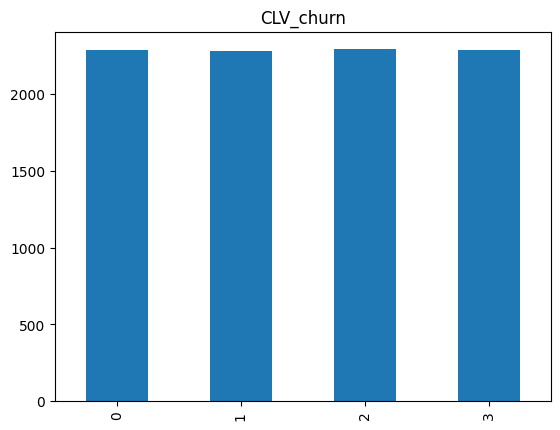

In [ ]:
# Verteilung der ZV anschauen
import matplotlib.pyplot as plt
fig = plt.figure()
df_1['CLV_churn'].value_counts(sort=False).sort_index().plot(kind='bar', title='CLV_churn')

**Hier Quelle suchen** die sagt, dass wenn Datensatz gleich verteilt ist, dass man dann die accuracy anschaut und nicht den f1 Wert --> datensatz ist hier balanciert

##**Schritt 2: Classification**

Immer 3 Varianten je Methode ausprobiert - Ergebnis: y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei KNN ansonsten keinen Unterschied

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
def evaluate(clf, X_test, y_true): #clf = classifier; X_test = neue Variable
  y_pred = clf.predict(X_test)
  print(classification_report(y_true, y_pred)) #performance von modell evaluieren

###**KNN**

####**KNN y skaliert - ohne Ergebnis**

In [ ]:
# y skaliert
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)
# funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: ignored

####**KNN y unskaliert**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
Ergebnisse_KNN_y_unskaliert = evaluate(knn, X_test, y_test) # 0.46

####**KNN y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
Ergebnisse_KNN_y_unskaliert_X_ohne_Dummies = evaluate(knn, X_test, y_test) # 0.6

####**Hyperparameter Tuning**

In [ ]:
# V1
from sklearn.model_selection import GridSearchCV
model = knn
grid_vals = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.61 statt 0.6

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = knn
grid_vals = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.64 statt 0.6

####**Error Analysis**

In [ ]:
#KNN
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**Logistische Regression**

####**Logistische Regression y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**Logistische Regression y unskaliert**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

In [ ]:
Ergebnisse_log_y_unskaliert = evaluate(logistic, X_test, y_test) # 0.61

####**Logistische Regression y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

In [ ]:
Ergebnisse_log_y_unskaliert_X_ohne_Dummies = evaluate(logistic, X_test, y_test) # 0.61

####**Hyperparameter Tuning**

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
# V1
from sklearn.model_selection import GridSearchCV
model = logistic
grid_vals = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
}

grid_lr = GridSearchCV(estimator=logistic, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.62 statt 0.61

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = logistic
grid_vals = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
}
grid_lr = GridSearchCV(estimator=logistic, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.68 statt 0.61

####**Error Analysis**

In [ ]:
#Logistische Regression
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**Decision Tree**

####**Decision Tree y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**Decision Tree y unskaliert**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
Ergebnisse_tree_y_unskaliert = evaluate(tree, X_test, y_test) # 0.92

####**Decision Tree y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
Ergebnisse_tree_y_unskaliert_X_ohne_Dummies = evaluate(tree, X_test, y_test) # 0.92

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X_skaliert_ohneDummies.columns);

####**Hyperparameter Tuning**

In [ ]:
# V1
from sklearn.model_selection import GridSearchCV
model = tree
grid_vals = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
}

grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.92 statt 0.92

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = tree
grid_vals = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = tree
grid_vals = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

####**Error Analysis**

In [ ]:
#Decision Tree
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**Random Forest**

####**Random Forest y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**Random Forest y unskaliert**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)


In [ ]:
Ergebnisse_forest_y_unskaliert = evaluate(random_forest, X_test, y_test) # 0.93

####**Random Forest y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)

In [ ]:
Ergebnisse_forest_y_unskaliert_X_ohne_Dummies = evaluate(random_forest, X_test, y_test) # 0.93

####**Hyperparameter Tuning**

In [ ]:
# V1
from sklearn.model_selection import GridSearchCV
model = random_forest
grid_vals = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
}

grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = random_forest
grid_vals = {
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

####**Error Analysis**

In [ ]:
#Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**XG Boost**

####**XGBoost y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**XGBoost y unskaliert**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
Ergebnisse_xg_y_unskaliert = evaluate(xgb, X_test, y_test) # 0.93

####**XGBoost y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
Ergebnisse_xg_y_unskaliert_X_ohne_Dummies = evaluate(xgb, X_test, y_test) # 0.93

####**Hyperparameter Tuning**

In [ ]:
# V1
from sklearn.model_selection import GridSearchCV
model = xgb
grid_vals = {
    'verbose': [0],
    'warm_start': [False]
}

grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = xgb
grid_vals = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None],
}

grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = xgb
grid_vals = {
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.94 statt 0.93

####**Error Analysis**

In [ ]:
#XG Boost
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###Ergebnis der Classification

hier ausführlichere Erklärung für was wir uns entschieden haben (X_skaliert_ohneDummies und y unskaliert)

**--> XG Boost V3 erzielt das beste Ergebnis mit 94% nach der Optimierung**
accuracy: wv % wurden richtig vorhergesagt
f1 Wert wenn DS sehr unbalanciert sonst accuracy
